In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import seaborn as sns


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
train.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47


In [4]:
test.head()

,id,comment_text
0,7000000,Jeff Sessions is another one of Trump's Orwell...
1,7000001,I actually inspected the infrastructure on Gra...
2,7000002,No it won't . That's just wishful thinking on ...
3,7000003,Instead of wringing our hands and nibbling the...
4,7000004,how many of you commenters have garbage piled ...


In [5]:
print(train.shape)
print(test.shape)

(1804874, 45)
(97320, 2)


In [6]:
train['comment_text'].value_counts().head()

Well said.    184
No.           160
Exactly.      132
Yes.          127
Thank you.    120
Name: comment_text, dtype: int64

In [7]:
train[train['target'] >= 0.5]['comment_text'].value_counts().head()

H.L. MENCKEN’S prediction:\n\n“As democracy is perfected, the office of the President represents, more and more closely, the inner soul of the people. On some great and glorious day, the plain folks of the Land will reach their heart’s desire at last, and the White House will be occupied by a downright fool and complete narcissist moron.”\n\n  -H.L. Mencken\nThe Baltimore Evening Sun,\nJuly 26, 1920    30
Nicky, you can't handle the truth. Both Harper and Harris were completely useless scumbags. One was the worst PM we will ever have, and the other is the worst Ontario Premier we will ever have. You can sling all the sing-song baloney you want, they were the worst.                                                                                                                                              24
You're an idiot.                                                                                                                                                                      

In [8]:
train_size = train.shape[0]
print(f'Above zero rate: {(train["target"] > 0).sum() / train_size:.2%}')
print(f'Toxic rate: {(train["target"] >= 0.5).sum() / train_size:.2%}')
print(f'100% Toxic rate: {(train["target"] == 1.0).sum() / train_size:.2%}')

Above zero rate: 29.93%
Toxic rate: 8.00%
100% Toxic rate: 0.24%


**Summary 1:**

Train set: ~1.8M rows  
Test set: ~100k rows  

* ~30% have target > 0
* ~8% are toxic (>= 0.5)
* ~0.24% are super-toxic (== 1.0)

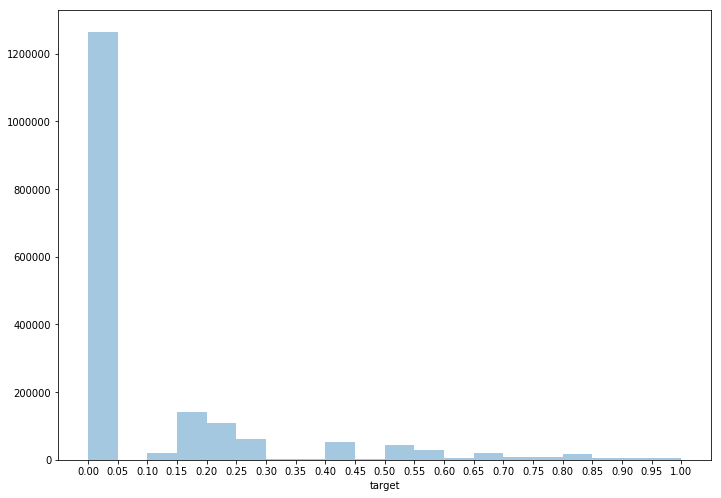

In [9]:
num_bins = 20
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.set_xticks(np.linspace(0,1,num_bins+1))

sns.distplot(train['target'], kde=False, ax=ax, bins=num_bins)

In [10]:
train['toxic'] = train['target'] >= 0.5

In [11]:
train['date'] = pd.to_datetime(train['created_date']).dt.date

In [12]:
plot_data = train.groupby('date')['toxic'].agg(['mean', 'count'])
plot_data = plot_data / plot_data.sum()

In [13]:
plot_data.columns

Index(['mean', 'count'], dtype='object')

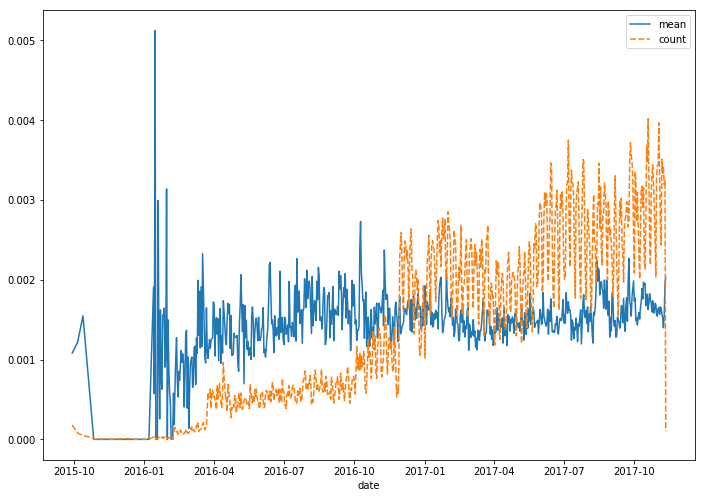

In [14]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(data=plot_data, ax=ax)